In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
import os

print("Packages Import Success!")

Packages Import Success!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/drive/My Drive/asl_alphabet_train/'

def get_data(folder):
    x = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,),dtype = np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    x[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
        return x,y 
x_train, y_train = get_data(train_dir)
print("Images Imported Successfully")

Images Imported Successfully


In [ ]:
print("x_train shapes",x_train.shape)
print("y_train shapes", y_train.shape)
print("Shape of 1 image", x_train[0].shape)

x_train shapes (87000, 64, 64, 3)
y_train shapes (87000,)
Shape of 1 image (64, 64, 3)


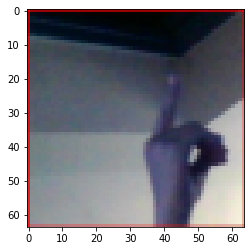

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
x_data = x_train
y_data = y_train
print("Copying Done!")

Copying Done!


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42,stratify=y_data)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


In [ ]:
import gc
del x_data
del y_data
gc.collect()

2738

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Package Import Successful!")

Package Import Successful!


In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(29, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_cat_train, epochs=50, batch_size=64, verbose=1, validation_data=(x_test, y_cat_test),
          callbacks=[early])

Epoch 1/50
952/952 [==============================] - 366s 383ms/step - loss: 0.0507 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
952/952 [==============================] - 367s 385ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
952/952 [==============================] - 367s 385ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
path = '/content/gdrive/My Drive/models/'
model.save_weights(path)

In [ ]:
model.save_weights('ASL-Model.h5')
print('Model Saved!')

Model Saved!


In [ ]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,4.191888e-02,0.993826,2.301972e-07,1.0
1,2.203923e-07,1.000000,1.150986e-07,1.0
2,1.150986e-07,1.000000,1.150986e-07,1.0
3,1.150986e-07,1.000000,1.150986e-07,1.0


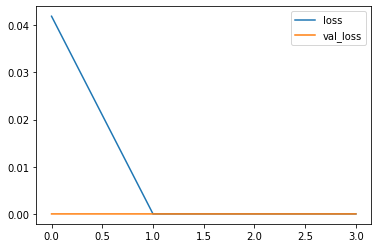

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

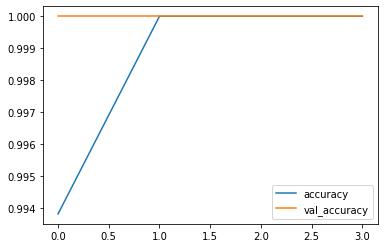

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=1)

816/816 [==============================] - 53s 65ms/step - loss: 1.1510e-07 - accuracy: 1.0000


[1.1509861508329777e-07, 1.0]

In [ ]:
predictions = model.predict(x_test)
print("Predictions done...")

Predictions done...


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions.round(), normalize=False))

NameError: ignored